## Poisson Processes and Radioactive Decay
---
**Author:** Andrea Real Blanco 

**Table of Contents**:
1. [Simple Decay](#simple-decay)
2. [Decay Chain](#decay-chain)
3. [Branched Decay](#branched-decay)

**Repository**: [github.com/arebla/poisson-disintegrations](https://github.com/arebla/poisson-disintegrations)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.grid'] = True
mpl.rcParams['grid.color'] = 'gainsboro'
mpl.rcParams['grid.linestyle'] = ':'
plt.rcParams['font.size'] = 14
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"

### 1. Simple Decay <a class="anchor" id="simple-decay"></a>

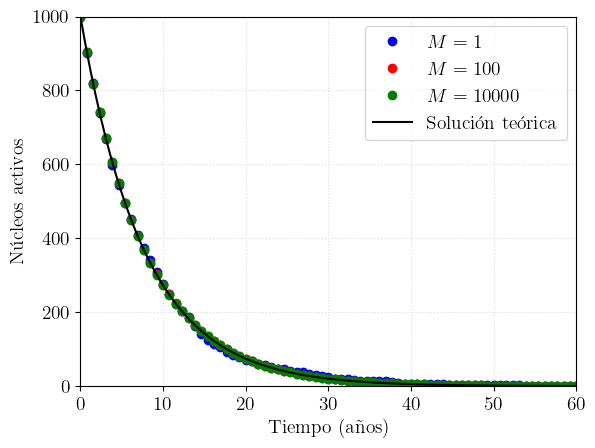

In [2]:
file_path_M1 = '../data/ejercicio_1_M1.csv'
file_path_M100 = '../data/ejercicio_1_M100.csv'
file_path_M10000 = '../data/ejercicio_1_M10000.csv'

df_M1 = pd.read_csv(file_path_M1, delimiter='\t')
df_M100 = pd.read_csv(file_path_M100, delimiter='\t')
df_M10000 = pd.read_csv(file_path_M10000, delimiter='\t')

def theoretical_solution(t, N_0, lambda_0):
    return N_0 * np.exp(-lambda_0 * t)
    
tt = np.linspace(0, 60, 100)

plt.plot(df_M1['Time'], df_M1['N'], 'o', color='blue', label='$M=1$')
plt.plot(df_M100['Time'], df_M100['N'], 'o', color='red', label='$M=100$')
plt.plot(df_M10000['Time'], df_M10000['N'], 'o', color='green', label='$M=10000$')
plt.plot(tt, theoretical_solution(tt, N_0=1000, lambda_0=0.13), '-', color='black', label='Solución teórica')

plt.xlabel('Tiempo (años)')
plt.ylabel('Núcleos activos')
plt.xlim(0, 60)
plt.ylim(0, 1000)
plt.legend()

#plt.savefig('fig-11.pdf', bbox_inches='tight')
plt.show()

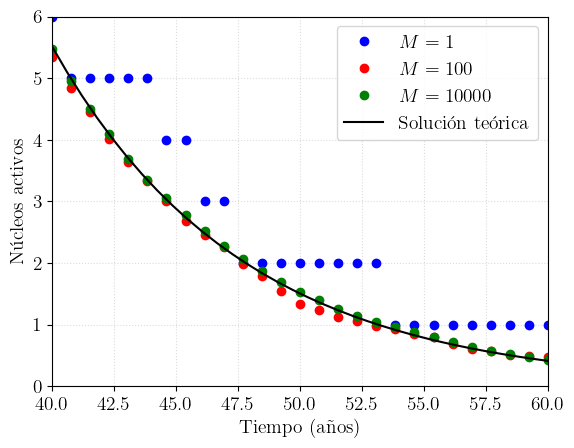

In [3]:
plt.plot(df_M1['Time'], df_M1['N'], 'o', color='blue', label='$M=1$')
plt.plot(df_M100['Time'], df_M100['N'], 'o', color='red', label='$M=100$')
plt.plot(df_M10000['Time'], df_M10000['N'], 'o', color='green', label='$M=10000$')
plt.plot(tt, theoretical_solution(tt, N_0=1000, lambda_0=0.13), '-', color='black', label='Solución teórica')

plt.xlabel('Tiempo (años)')
plt.ylabel('Núcleos activos')
plt.xlim(40, 60)
plt.ylim(0, 6)
plt.legend()

#plt.savefig('fig-12.pdf', bbox_inches='tight')
plt.show()

### 2. Decay Chain <a class="anchor" id="decay-chain"></a>

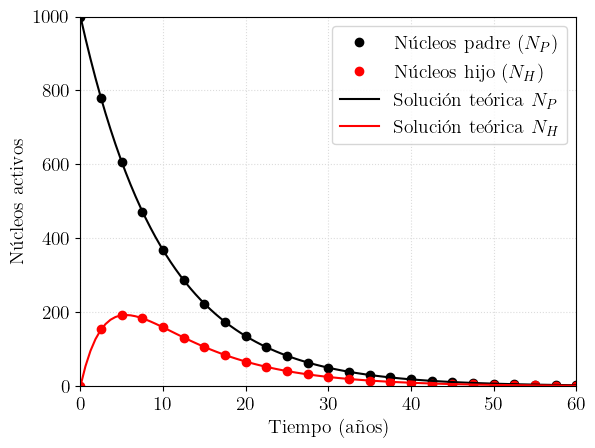

In [4]:
file_path_2_2 = '../data/ejercicio_2_2.csv'
file_path_2_3 = '../data/ejercicio_2_3.csv'

df_2_2 = pd.read_csv(file_path_2_2, delimiter='\t', index_col=False)
df_2_3 = pd.read_csv(file_path_2_3, delimiter='\t', index_col=False)

def N_P(t, N_P0, lambda_P):
    return N_P0 * np.exp(-lambda_P * t)
    
def N_H(t, N_P0, N_H0, lambda_P, lambda_H):
    return (N_P0 * lambda_P / (lambda_H - lambda_P) *
            (np.exp(-lambda_P * t) - np.exp(-lambda_H * t)) +
            N_H0 * np.exp(-lambda_H * t))
    
tt = np.linspace(0, 60, 100)

plt.plot(df_2_2['Time'], df_2_2['N_P'], 'o', color='black', label='Núcleos padre ($N_P$)')
plt.plot(df_2_2['Time'], df_2_2['N_H'], 'o', color='red', label='Núcleos hijo ($N_H$)')
plt.plot(tt, N_P(tt, N_P0=1000, lambda_P=0.1), '-', color='black', label='Solución teórica $N_P$')
plt.plot(tt, N_H(tt, N_P0=1000, N_H0=0, lambda_P=0.1, lambda_H=0.3), '-', color='red', label='Solución teórica $N_H$')

plt.xlabel('Tiempo (años)')
plt.ylabel('Núcleos activos')
plt.xlim(0, 60)
plt.ylim(0, 1000)
plt.legend()

#plt.savefig('fig-22.pdf', bbox_inches='tight')
plt.show()

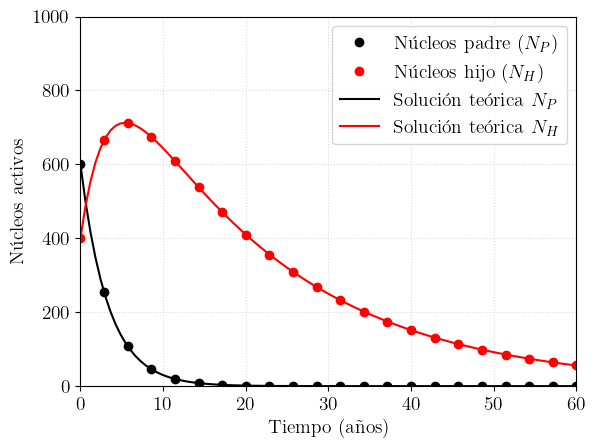

In [5]:
plt.plot(df_2_3['Time'], df_2_3['N_P'], 'o', color='black', label='Núcleos padre ($N_P$)')
plt.plot(df_2_3['Time'], df_2_3['N_H'], 'o', color='red', label='Núcleos hijo ($N_H$)')
plt.plot(tt, N_P(tt, N_P0=600, lambda_P=0.3), '-', color='black', label='Solución teórica $N_P$')
plt.plot(tt, N_H(tt, N_P0=600, N_H0=400, lambda_P=0.3, lambda_H=0.05), '-', color='red', label='Solución teórica $N_H$')

plt.xlabel('Tiempo (años)')
plt.ylabel('Núcleos activos')
plt.xlim(0, 60)
plt.ylim(0, 1000)
plt.legend()

#plt.savefig('fig-23.pdf', bbox_inches='tight')
plt.show()

### 3. Branched Decay <a class="anchor" id="branched-decay"></a>

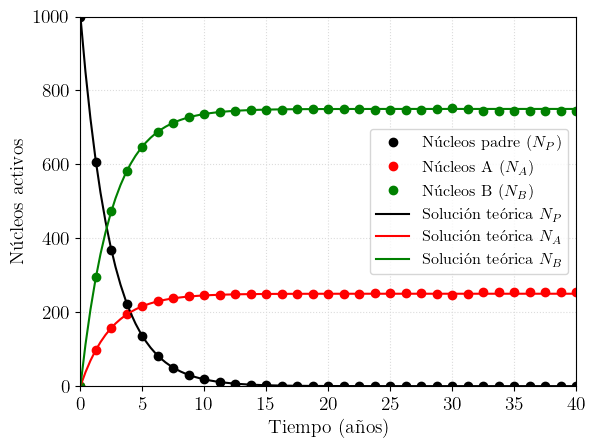

In [6]:
file_path_3_2 = '../data/ejercicio_3_2.csv'
file_path_3_3 = '../data/ejercicio_3_3.csv'

df_3_2 = pd.read_csv(file_path_3_2, delimiter='\t')
df_3_3 = pd.read_csv(file_path_3_3, delimiter='\t')

def N_P(t, N_P0, lambda_A, lambda_B):
    return N_P0*np.exp(-(lambda_A + lambda_B) * t)
    
def N_A(t, N_P0, N_A0, lambda_A, lambda_B):
    return N_P0 * lambda_A / (lambda_A + lambda_B) * (1 - np.exp(-(lambda_A + lambda_B) * t)) + N_A0
             
def N_B(t, N_P0, N_B0, lambda_A, lambda_B):
   return N_P0 * lambda_B / (lambda_A + lambda_B) * (1 - np.exp(-(lambda_A + lambda_B) * t)) + N_B0            
    
tt = np.linspace(0, 40, 100)

plt.plot(df_3_2['Time'], df_3_2['N_P'], 'o', color='black', label='Núcleos padre ($N_P$)')
plt.plot(df_3_2['Time'], df_3_2['N_A'], 'o', color='red', label='Núcleos A ($N_A$)')
plt.plot(df_3_2['Time'], df_3_2['N_B'], 'o', color='green', label='Núcleos B ($N_B$)')
plt.plot(tt, N_P(tt, N_P0=1000, lambda_A=0.1, lambda_B=0.3), '-', color='black', label='Solución teórica $N_P$')
plt.plot(tt, N_A(tt, N_P0=1000, N_A0=0, lambda_A=0.1, lambda_B=0.3), '-', color='red', label='Solución teórica $N_A$')
plt.plot(tt, N_B(tt, N_P0=1000, N_B0=0, lambda_A=0.1, lambda_B=0.3), '-', color='green', label='Solución teórica $N_B$')
#
plt.xlabel('Tiempo (años)')
plt.ylabel('Núcleos activos')
plt.xlim(0, 40)
plt.ylim(0, 1000)
plt.legend(fontsize='small')

#plt.savefig('fig-32.pdf', bbox_inches='tight')
plt.show()

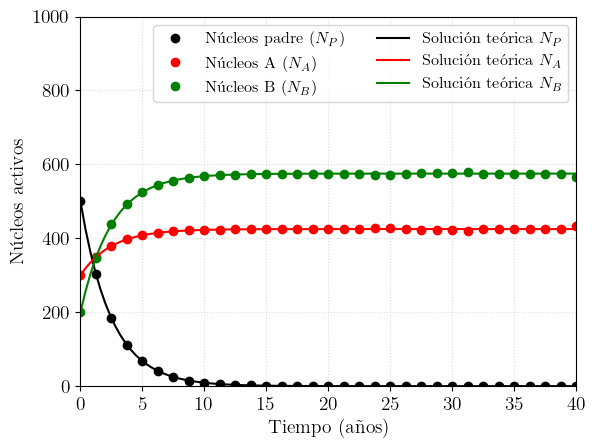

In [7]:
plt.plot(df_3_3['Time'], df_3_3['N_P'], 'o', color='black', label='Núcleos padre ($N_P$)')
plt.plot(df_3_3['Time'], df_3_3['N_A'], 'o', color='red', label='Núcleos A ($N_A$)')
plt.plot(df_3_3['Time'], df_3_3['N_B'], 'o', color='green', label='Núcleos B ($N_B$)')
plt.plot(tt, N_P(tt, N_P0=500, lambda_A=0.1, lambda_B=0.3), '-', color='black', label='Solución teórica $N_P$')
plt.plot(tt, N_A(tt, N_P0=500, N_A0=300, lambda_A=0.1, lambda_B=0.3), '-', color='red', label='Solución teórica $N_A$')
plt.plot(tt, N_B(tt, N_P0=500, N_B0=200, lambda_A=0.1, lambda_B=0.3), '-', color='green', label='Solución teórica $N_B$')
#
plt.xlabel('Tiempo (años)')
plt.ylabel('Núcleos activos')
plt.xlim(0, 40)
plt.ylim(0, 1000)
plt.legend(fontsize='small', ncol=2)

#plt.savefig('fig-33.pdf', bbox_inches='tight')
plt.show()